In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import cv2  
from tqdm import tqdm

from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

import multiprocessing

In [2]:
def show_image(images,name,row,col,size1=15,size2=15):
    n = len(images)
    plt.subplots(figsize=(15, 15))

    for i in range(n):
        plt.subplot(row,col,i+1)
        plt.title(name[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')   
    plt.show()

In [4]:
train_path = "data/train"
test_path = "data/test"

In [5]:
train = os.listdir(train_path)
test = os.listdir(test_path)


In [6]:
train_image = [cv2.cvtColor(cv2.imread(os.path.join(train_path, image)), cv2.COLOR_BGR2RGB)  for image in train ]

In [7]:
test_image = [cv2.cvtColor(cv2.imread(os.path.join(test_path, image)), cv2.COLOR_BGR2RGB)  for image in test ]

In [7]:
print("Image size: ", train_image[0].shape)
print("Train images:", len(train_image))
print("Test images:", len(test_image))

Image size:  (490, 680, 3)
Train images: 7500
Test images: 1200


# Main color Detection

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

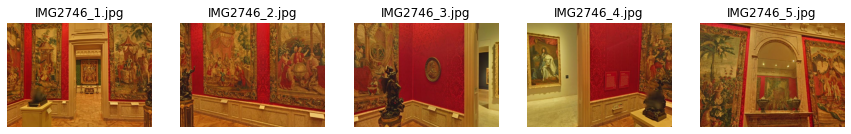

In [14]:
show_image(train_image[10:15],train[10:15],1,5)

In [15]:
def main_color(images,n_color,show = False):

    clf = KMeans(n_clusters = n_color)

    color_total = []
    weight_total = []

    for image in tqdm(images):
        modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
        flatten = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

        labels = clf.fit_predict(flatten)

        counts = Counter(labels)

        center_colors = clf.cluster_centers_

        hex_colors = [RGB2HEX(center_colors[i]) for i in counts.keys()]

        color_total.append(center_colors)
        weight_total.append( [i/sum(counts.values()) for i in counts.values()])



        if show:
            plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
            plt.show()

    return color_total,weight_total

  0%|          | 0/5 [00:00<?, ?it/s]

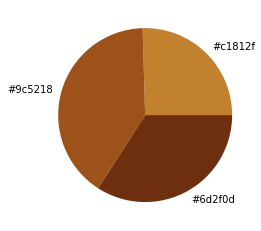

 20%|██        | 1/5 [00:01<00:07,  1.94s/it]

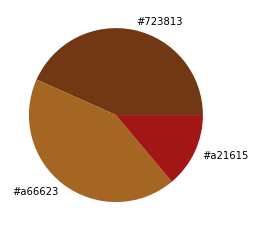

 40%|████      | 2/5 [00:03<00:05,  1.98s/it]

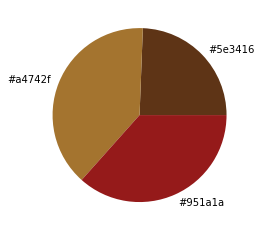

 60%|██████    | 3/5 [00:05<00:03,  1.70s/it]

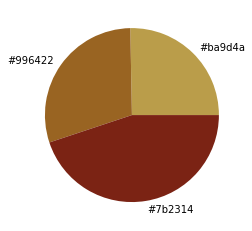

 80%|████████  | 4/5 [00:06<00:01,  1.60s/it]

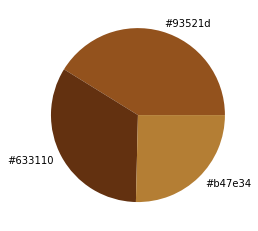

100%|██████████| 5/5 [00:08<00:00,  1.74s/it]


([array([[109.32640371,  47.94397429,  13.73104472],
         [156.00890715,  82.96557618,  24.05498749],
         [193.12657898, 129.47557577,  47.88541718]]),
  array([[114.19096872,  56.78989119,  19.5007923 ],
         [166.36285179, 102.27603222,  35.53676399],
         [162.22291235,  22.14555766,  21.71869655]]),
  array([[149.63369905,  26.23856664,  26.89726512],
         [ 94.86114325,  52.75530793,  22.12436203],
         [164.77432701, 116.93401612,  47.2204024 ]]),
  array([[153.41027365, 100.2512534 ,  34.08209394],
         [123.78642866,  35.10362199,  20.69625925],
         [186.5053118 , 157.51188988,  74.12192475]]),
  array([[180.88827584, 126.52769364,  52.79056632],
         [ 99.27877206,  49.88863355,  16.9009854 ],
         [147.9320904 ,  82.51094566,  29.1609578 ]])],
 [[0.25471666666666665, 0.4045666666666667, 0.34071666666666667],
  [0.4330375, 0.42816666666666664, 0.13879583333333334],
  [0.24395, 0.39010833333333333, 0.36594166666666667],
  [0.2529625, 0.

In [16]:
main_color(train_image[10:15],3,True)

In [16]:
color_total_train,weight_total_train = main_color(train_image,3)

100%|██████████| 7500/7500 [3:31:36<00:00,  1.69s/it]


In [19]:
trian_label["color"] = pd.Series(color_total_train)
trian_label["weight"] = pd.Series(weight_total_train)
trian_label.to_csv("data/with_color_train.csv")

In [12]:
color_total_test,weight_total_test = main_color(test_image,3)

100%|██████████| 1200/1200 [25:21<00:00,  1.27s/it]


In [14]:
test_label = pd.read_csv("data/imagenames.csv")

test_label["color"] = pd.Series(color_total_test)
test_label["weight"] = pd.Series(weight_total_test)


test_label.to_csv("data/with_color_test.csv")